In [155]:
import pandas as pd
import numpy as np

ob= pd.read_csv('observations.csv')
print(ob.head())

sp = pd.read_csv('species_info.csv')
#print(sp.head())


            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


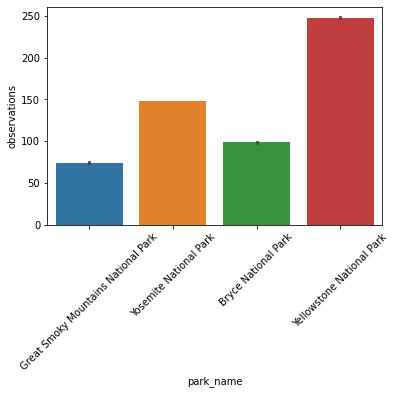

In [138]:
sns.barplot(data=ob, x='park_name',y='observations')
plt.xticks(rotation = 45)
plt.show()

In [139]:
# to create a new dataframe we can have: df2=pd.dataframe({
# "city":['LA','Boston','NY'],
# "Temp":[92,99,90]
# })
 
# to merge--} df3 = pd.merge(df1, df2, on="coulumn2", how="outer, inner(default), left, right", indicator=True, False(default), suffixes=('_left',"_right"))

merge_ob_sp = pd.merge(ob,sp, on='scientific_name',how='outer')
print(merge_ob_sp)


                  scientific_name                            park_name  \
0              Vicia benghalensis  Great Smoky Mountains National Park   
1              Vicia benghalensis               Yosemite National Park   
2              Vicia benghalensis            Yellowstone National Park   
3              Vicia benghalensis                  Bryce National Park   
4                  Neovison vison  Great Smoky Mountains National Park   
...                           ...                                  ...   
25627                   Gulo gulo               Yosemite National Park   
25628  Dichanthelium depauperatum  Great Smoky Mountains National Park   
25629  Dichanthelium depauperatum                  Bryce National Park   
25630  Dichanthelium depauperatum            Yellowstone National Park   
25631  Dichanthelium depauperatum               Yosemite National Park   

       observations        category                        common_names  \
0                68  Vascular Plant 

In [140]:
merge_ob_sp.shape

(25632, 6)

In [141]:
merge_ob_sp= merge_ob_sp.drop_duplicates()
merge_ob_sp.nunique()


scientific_name        5541
park_name                 4
observations            304
category                  7
common_names           5504
conservation_status       4
dtype: int64

In [142]:
merge_ob_sp.isna().sum()


scientific_name            0
park_name                  0
observations               0
category                   0
common_names               0
conservation_status    24721
dtype: int64

In [143]:
merge_ob_sp = merge_ob_sp.fillna('No Info Yet')


In [144]:
merge_ob_sp.park_name.unique

<bound method Series.unique of 0        Great Smoky Mountains National Park
1                     Yosemite National Park
2                  Yellowstone National Park
3                        Bryce National Park
4        Great Smoky Mountains National Park
                        ...                 
25627                 Yosemite National Park
25628    Great Smoky Mountains National Park
25629                    Bryce National Park
25630              Yellowstone National Park
25631                 Yosemite National Park
Name: park_name, Length: 25601, dtype: object>

In [145]:
merge_ob_sp

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Info Yet
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Info Yet
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Info Yet
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Info Yet
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Info Yet
...,...,...,...,...,...,...
25627,Gulo gulo,Yosemite National Park,157,Mammal,Wolverine,No Info Yet
25628,Dichanthelium depauperatum,Great Smoky Mountains National Park,88,Vascular Plant,"Green Panic-Grass, Panic Grass",No Info Yet
25629,Dichanthelium depauperatum,Bryce National Park,80,Vascular Plant,"Green Panic-Grass, Panic Grass",No Info Yet
25630,Dichanthelium depauperatum,Yellowstone National Park,255,Vascular Plant,"Green Panic-Grass, Panic Grass",No Info Yet


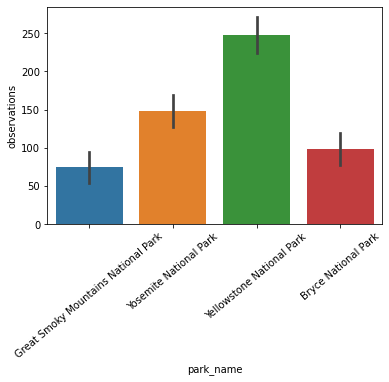

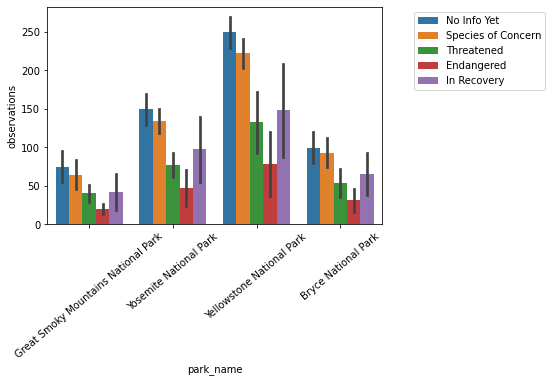

In [146]:
#get the conservation status of the entire data set.
import matplotlib.pyplot as plt
import seaborn as sns


sns.barplot(data=merge_ob_sp, x='park_name', y='observations', ci='sd')
plt.xticks(rotation=40)

plt.show()

plt.clf()

sns.barplot(data=merge_ob_sp, x='park_name', y='observations', hue='conservation_status', ci='sd')
plt.xticks(rotation=40)
plt.legend(bbox_to_anchor=(1.08,1), loc='upper left')
plt.show()


Looking at the conservative status of the four parks, looks like Yellowstone Park has the greatest number of endangered species, as well as the most number of recoveries as well. 
Great Smoky Mountains Park has the least number. 
Looks like the proportions are pretty relative to the size of the parks themselves. 

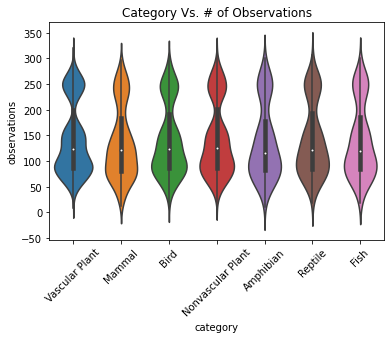

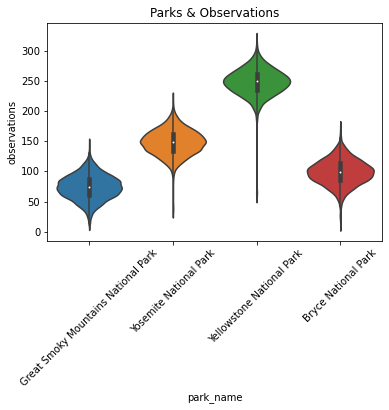

<Figure size 432x288 with 0 Axes>

In [147]:
# trying violin plots. 
sns.violinplot(data=merge_ob_sp, x='category', y='observations')
plt.xticks(rotation = 45)
plt.title('Category Vs. # of Observations')
plt.show()

plt.clf()

sns.violinplot(data=merge_ob_sp, x='park_name', y='observations')
plt.xticks(rotation=45)
plt.title("Parks & Observations")
plt.show()
plt.clf()

With the first violine plot, we see that majority of the species have beenn observed 60 - 150 times. Very few have been observed 200 times. A decent amount of species have been observed 250. These observations are very right skewed. 

When ploting observtions among each National Parks, I find that onn average more observationns have been made on Yellowstone Park and Yosemite, thann on Bryce and Great Smoky Mts, probably relative to their size as well . However, the observations by each Park is very Normalized compare to observations by each species.



In [148]:
yosemite = merge_ob_sp[merge_ob_sp['park_name'] == 'Yosemite National Park']
yellowstone = merge_ob_sp[merge_ob_sp['park_name'] == 'Yellowstone National Park']
bryce = merge_ob_sp[merge_ob_sp['park_name'] == 'Bryce National Park']
great_smoky = merge_ob_sp[merge_ob_sp['park_name'] == 'Great Smoky Mountains National Park']

#yosemite.shape
#yellowstone.shape
#bryce.shape
#great_smoky.shape

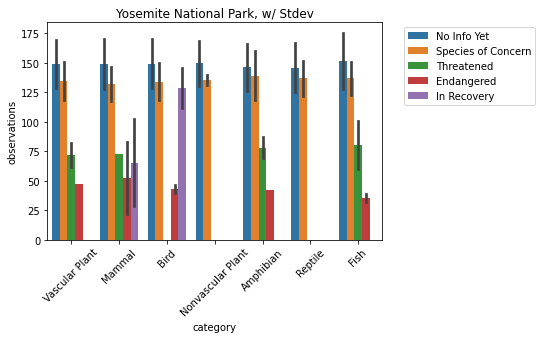

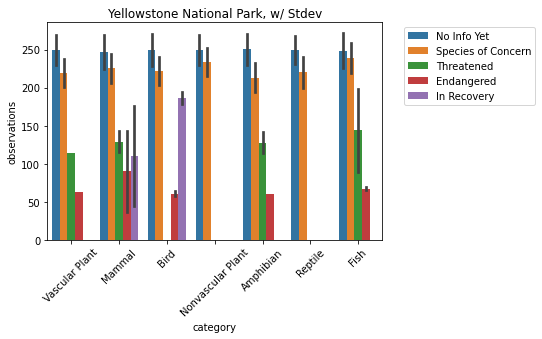

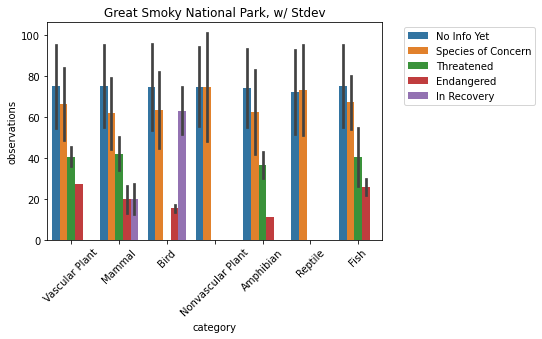

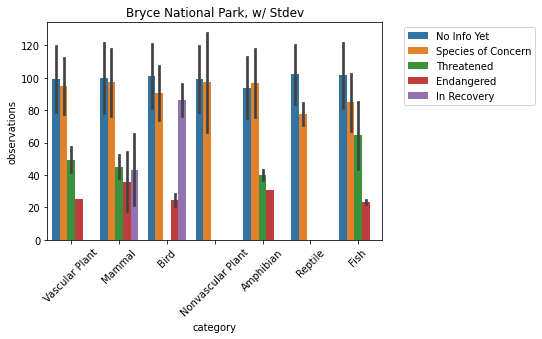

<Figure size 432x288 with 0 Axes>

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.barplot(data=yosemite, x='category', y='observations', hue='conservation_status', ci='sd')
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05,1), loc ='upper left')
plt.title('Yosemite National Park, w/ Stdev')
#plt.ylim(135,155)
plt.show()

plt.clf()

sns.barplot(data=yellowstone, x='category', y='observations', hue='conservation_status', ci='sd')
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05,1), loc ='upper left')
#plt.ylim(135,155)
plt.title('Yellowstone National Park, w/ Stdev')
plt.show()

plt.clf()

sns.barplot(data=great_smoky, x='category', y='observations', hue='conservation_status', ci='sd')
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05,1), loc ='upper left')
plt.title('Great Smoky National Park, w/ Stdev')
#plt.ylim(135,155)
plt.show()

plt.clf()

sns.barplot(data=bryce, x='category', y='observations', hue='conservation_status',ci='sd')
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05,1), loc ='upper left')
plt.title('Bryce National Park, w/ Stdev')
#plt.ylim(135,155)
plt.show()

plt.clf()

Looking at the bar plots from each park, looks like Birds and Mammals are the only two categorires where a recovery is taking place.
The Standard Deviation does vary among each Park. 
Do not see any hopes of recovery for other species. Need more data on the "No Info Yet" species to make further predictions. 
Nonvascular Plants and Amphibians are the more endangered species. The reaosn being that that is a large number of them whom we don't have a good idea about, and the onces we know about are only under the captegory of "species of concern".

Null Hypothesis: The consevation status among the observed species is equal.

Alternative Hypothesis: The conservation status among the observed species is Very different.

In [151]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(yosemite.observations, yosemite.conservation_status, 0.05)
print(tukey_results)



             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
      group1             group2       meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------
        Endangered        In Recovery    49.85  0.001  24.2027  75.4973   True
        Endangered        No Info Yet 101.9194  0.001  89.5789 114.2599   True
        Endangered Species of Concern  86.9429  0.001  73.9665  99.9193   True
        Endangered         Threatened  30.0318  0.001   9.3487  50.7149   True
       In Recovery        No Info Yet  52.0694  0.001  29.5643  74.5745   True
       In Recovery Species of Concern  37.0929  0.001  14.2329  59.9528   True
       In Recovery         Threatened -19.8182 0.2996 -47.7821   8.1457  False
       No Info Yet Species of Concern -14.9765  0.001 -19.1094 -10.8436   True
       No Info Yet         Threatened -71.8876  0.001 -88.5154 -55.2598   True
Species of Concern         Threatened -56.9111  0.00

Tukey Results, Yosemite: 
In most groups that null hypothesis is rejected. There is significant difference between the conservation status among observed species.
The only group, when compared, has the same average conservation status was between "In Recovery" and "Threatened" species. 


In [152]:
tukey_results2 = pairwise_tukeyhsd(yellowstone.observations, yellowstone.conservation_status)
print(tukey_results2)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
      group1             group2        meandiff p-adj    lower    upper   reject
--------------------------------------------------------------------------------
        Endangered        In Recovery   70.2667  0.001   44.6495  95.8838   True
        Endangered        No Info Yet  171.4617  0.001  159.1357 183.7877   True
        Endangered Species of Concern  144.3787  0.001  131.4176 157.3398   True
        Endangered         Threatened   54.7364  0.001   34.0776  75.3951   True
       In Recovery        No Info Yet   101.195  0.001   78.7164 123.6736   True
       In Recovery Species of Concern    74.112  0.001   51.2789  96.9451   True
       In Recovery         Threatened  -15.5303 0.5444  -43.4613  12.4007  False
       No Info Yet Species of Concern   -27.083  0.001  -31.2111 -22.9549   True
       No Info Yet         Threatened -116.7253  0.001 -133.3336 -100.117   True
Species of Concern         T

Tukey Results, Yellowstone.
Results are similar to Yosemite Park. 

In [153]:
tukey_results3 = pairwise_tukeyhsd(bryce.observations, bryce.conservation_status, 0.05)
print(tukey_results3)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
      group1             group2       meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------
        Endangered        In Recovery  33.7167 0.0034   7.8953   59.538   True
        Endangered        No Info Yet  68.3765  0.001  55.9523  80.8008   True
        Endangered Species of Concern  62.0063  0.001  48.9419  75.0707   True
        Endangered         Threatened  22.7773 0.0238   1.9538  43.6007   True
       In Recovery        No Info Yet  34.6599  0.001  12.0021  57.3177   True
       In Recovery Species of Concern  28.2896 0.0072   5.2745  51.3047   True
       In Recovery         Threatened -10.9394 0.8037 -39.0931  17.2143  False
       No Info Yet Species of Concern  -6.3703  0.001 -10.5312  -2.2094   True
       No Info Yet         Threatened -45.5993  0.001 -62.3399 -28.8586   True
Species of Concern         Threatened  -39.229  0.00

Tukey Results, Bryce National Park. 
The results are the same as Yosemite and Yellowstone.

In [154]:
tukey_results4 = pairwise_tukeyhsd(great_smoky.observations, great_smoky.conservation_status, 0.05)
print(tukey_results4)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
      group1             group2       meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------
        Endangered        In Recovery  21.6833 0.1354  -3.7137  47.0803  False
        Endangered        No Info Yet  55.0202  0.001  42.8001  67.2402   True
        Endangered Species of Concern  44.4757  0.001   31.626  57.3254   True
        Endangered         Threatened    20.35 0.0525  -0.1312  40.8312  False
       In Recovery        No Info Yet  33.3368  0.001  11.0514  55.6223   True
       In Recovery Species of Concern  22.7923 0.0475   0.1555  45.4292   True
       In Recovery         Threatened  -1.3333    0.9 -29.0243  26.3577  False
       No Info Yet Species of Concern -10.5445  0.001 -14.6371  -6.4519   True
       No Info Yet         Threatened -34.6702  0.001 -51.1357 -18.2046   True
Species of Concern         Threatened -24.1257  0.00

Tukey Results, Great Smoky National Park.
Among the groups:
Endangered - In Recovery 
Endangered - Threatened
In Recovery - Threatened
The null hypothesis is NOT rejected. 